<a href="https://colab.research.google.com/github/shonkhochil/Tensorflow-Bootcamp/blob/master/Autoencoder_TF2_0_Jose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
data = make_blobs(n_samples=500,
                  n_features=2,
                  centers=2,
                  cluster_std=1.0, random_state=101)

In [ ]:
data

(array([[ -9.56194311,  -6.03571385],
        [  1.33529669,   1.74313539],
        [ -8.89358376,  -8.03957984],
        [  1.46014222,   0.49513013],
        [  1.3320287 ,   2.4452676 ],
        [ -0.04988894,   3.36877163],
        [ -8.74875766,  -7.00106696],
        [ -8.41195044,  -6.96991405],
        [-11.09995678,  -6.98777058],
        [-10.70705417,  -6.68336889],
        [ -9.83450945,  -6.37108491],
        [ -0.6473768 ,   0.35850114],
        [  0.85678605,   0.8243512 ],
        [ -1.3503111 ,   1.74732484],
        [ -8.27921474,  -6.90305842],
        [ -0.96301934,   1.40447543],
        [-11.16941215,  -6.43554731],
        [  0.29639341,   2.06317757],
        [ -8.95896588,  -5.6190734 ],
        [ -9.61582494,  -6.32650449],
        [-10.09745917,  -5.90112464],
        [ -0.4707075 ,   1.22404217],
        [ -7.47018049,  -5.66117082],
        [ -8.36198905,  -9.3268063 ],
        [  2.93393983,   2.09686062],
        [ -8.61169941,  -7.28403611],
        [  1

In [ ]:
X, y = data

In [ ]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

print(z_noise)

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
495    0.580864
496   -0.270713
497   -2.136035
498    1.892137
499   -0.697859
Length: 500, dtype: float64


In [ ]:
feat = pd.concat([pd.DataFrame(X), z_noise], axis=1)

In [ ]:
feat.head()

,0,1,0
0,-9.561943,-6.035714,2.706850
1,1.335297,1.743135,0.628133
2,-8.893584,-8.039580,0.907969
3,1.460142,0.495130,0.503826
4,1.332029,2.445268,0.651118


In [ ]:
feat.columns = ['X1', 'X2', 'X3']

In [ ]:
feat.head()

,X1,X2,X3
0,-9.561943,-6.035714,2.706850
1,1.335297,1.743135,0.628133
2,-8.893584,-8.039580,0.907969
3,1.460142,0.495130,0.503826
4,1.332029,2.445268,0.651118


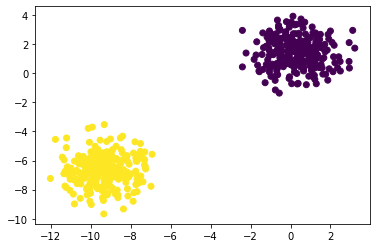

In [ ]:
plt.scatter(feat['X1'], feat['X2'], c=y)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
%matplotlib inline

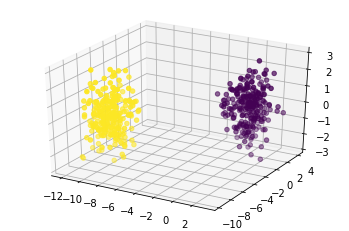

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'], feat['X2'], feat['X3'], c=y)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
encoder = Sequential()
encoder.add(Dense(units=2, activation='relu', input_shape=[3]))

decoder = Sequential()
decoder.add(Dense(units=3, activation='relu', input_shape=[2]))

In [ ]:
autoencoder = Sequential([encoder, decoder])

In [ ]:
autoencoder.compile(loss='mse', optimizer=SGD(learning_rate=1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaled_data = scaler.fit_transform(feat)

In [ ]:
autoencoder.fit(scaled_data, scaled_data, epochs=5)

Epoch 1/5
16/16 [==============================] - 0s 1ms/step - loss: 0.1239
Epoch 2/5
16/16 [==============================] - 0s 989us/step - loss: 0.0975
Epoch 3/5
16/16 [==============================] - 0s 957us/step - loss: 0.0959
Epoch 4/5
16/16 [==============================] - 0s 1ms/step - loss: 0.0957
Epoch 5/5
16/16 [==============================] - 0s 1ms/step - loss: 0.0957


In [ ]:
encoded_2dim = encoder.predict(scaled_data)
encoded_2dim.shape

(500, 2)

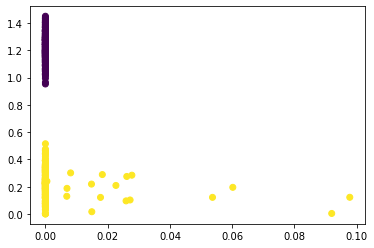

In [ ]:
plt.scatter(encoded_2dim[:,0], encoded_2dim[:,1], c=y)

Autoencoder Application on MNIST data set

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


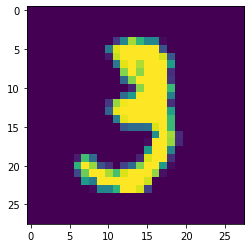

In [ ]:
plt.imshow(X_train[10])

In [ ]:
X_train = X_train/255

In [ ]:
X_test = X_test/255

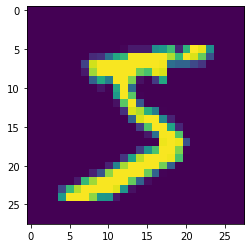

In [ ]:
plt.imshow(X_train[0])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
28*28

784

In [ ]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [ ]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [ ]:
autoencoder = Sequential([encoder,decoder])

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
autoencoder.compile(loss='binary_crossentropy',
                    optimizer=SGD(learning_rate=1.5),
                    metrics=['accuracy'])

In [ ]:
autoencoder.fit(X_train,X_train,epochs=5,
                validation_data=[X_test,X_test])

Epoch 1/5
1872/1875 [============================>.] - ETA: 0s - loss: 0.0225 - accuracy: 0.0797

ValueError: ignored

Autoencoder Exercise

In [ ]:
df = pd.read_csv('/content/sample_data/UK_foods.csv', index_col='Unnamed: 0')
df.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


In [ ]:
df.T

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


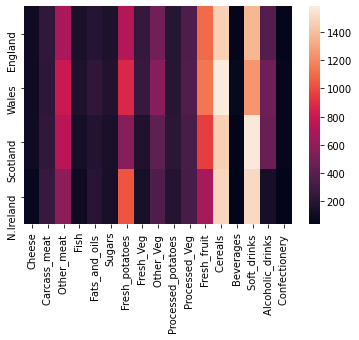

In [ ]:
sns.heatmap(df.T)

Autoencoder

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
encoder = Sequential()
encoder.add(Dense(8, activation='relu', input_shape=[17]))
encoder.add(Dense(4, activation='relu', input_shape=[8]))
encoder.add(Dense(2, activation='relu', input_shape=[4]))

In [ ]:
decoder = Sequential()
decoder.add(Dense(4, activation='relu',input_shape=[2]))
decoder.add(Dense(8, activation='relu',input_shape=[4]))
decoder.add(Dense(17, activation='relu',input_shape=[8]))

In [ ]:
autoencoder = Sequential([encoder, decoder])

In [ ]:
autoencoder.compile(loss='mse', optimizer=SGD(learning_rate=1.5))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaled_df = scaler.fit_transform(df.T.values)

In [ ]:
scaled_df.shape

(4, 17)

In [ ]:
autoencoder.fit(scaled_df, scaled_df, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 1ms/step - loss: 0.2380
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 0.2380
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 0.2380
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 0.2380
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 0.2380


In [ ]:
encoded_2dim = encoder.predict(scaled_df)

In [ ]:
print(encoded_2dim)

[[0.         0.12748666]
 [0.         0.03502698]
 [0.         0.        ]
 [0.         0.        ]]


In [ ]:
df.T.index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [ ]:
results = pd.DataFrame(data=encoded_2dim,
                       index = df.T.index,
                       columns = ['C1', 'C2'])

In [ ]:
print(results)

            C1        C2
England    0.0  0.127487
Wales      0.0  0.035027
Scotland   0.0  0.000000
N.Ireland  0.0  0.000000


In [ ]:
results = results.reset_index()

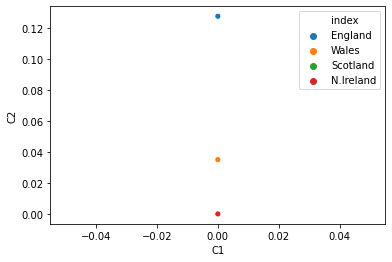

In [ ]:
sns.scatterplot(x='C1', y='C2', data=results, hue='index')